In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Edens25/PRO_OSCAR/main/%D7%90%D7%95%D7%A1%D7%A7%D7%A8.csv')

In [3]:
features=['rate', 'metascore', 'votes', 'duration', 'gross']

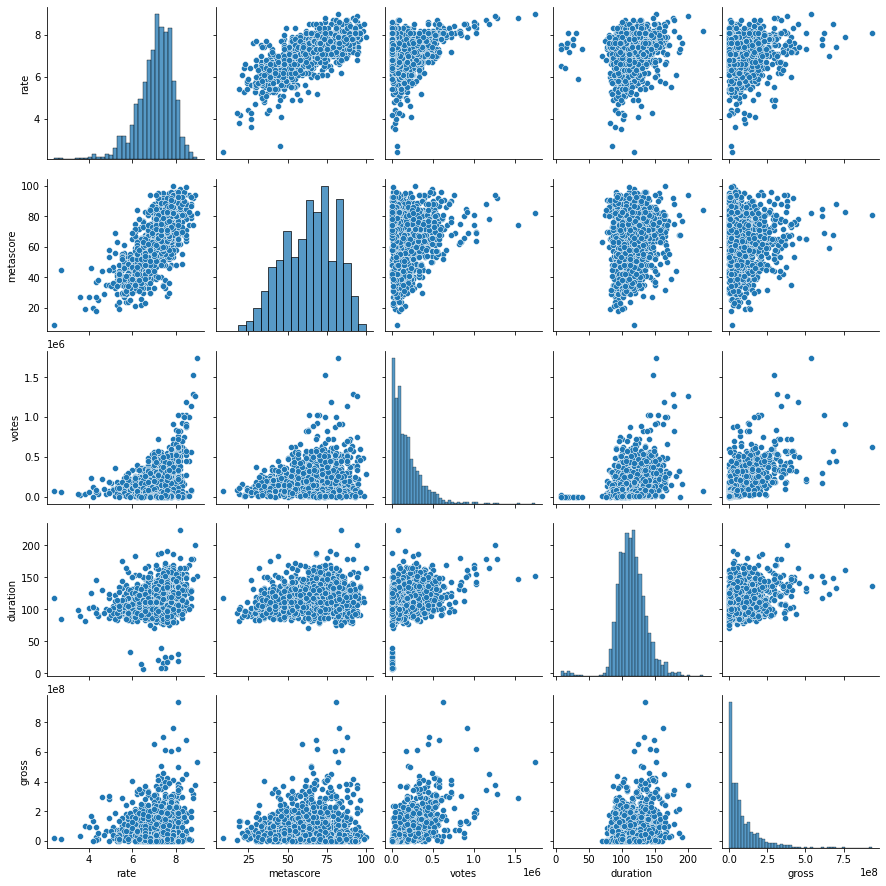

In [4]:
sns.pairplot(data[features], height = 2.5)

In [5]:
features1=['rate', 'awards_wins', 'votes', 'awards_nominations', 'gross','popularity','user_reviews']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C244F45D00>,
      dtype=object)

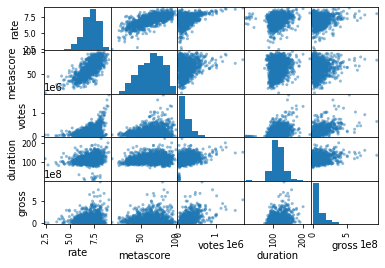

In [6]:
pd.plotting.scatter_matrix(data[features])

In [7]:
#pd.plotting.scatter_matrix(data[:])

In [8]:
#corrs = data.drop(columns='movie_id').select_dtypes(include=np.number).corr(method = 'kendall')
#sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

In [9]:
awards_data=data[['People_Choice_won','Hollywood_Film_won','Austin_Film_Critics_Association_won','Denver_Film_Critics_Society_won']]
awards_data

,People_Choice_won,Hollywood_Film_won,Austin_Film_Critics_Association_won,Denver_Film_Critics_Society_won
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,2,0,0,0
...,...,...,...,...
1230,0,0,0,0
1231,0,0,0,0
1232,0,0,0,0
1233,0,0,0,0


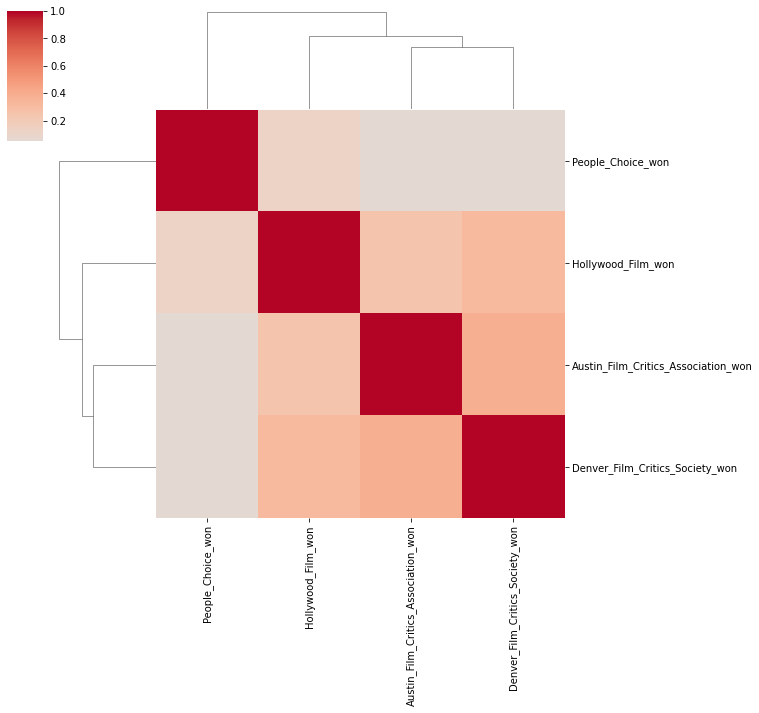

In [10]:
corrs = awards_data.select_dtypes(include=np.number).corr(method = 'kendall')
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

In [11]:
corrs = awards_data.corr(method='spearman')
corrs.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '15pt'})


,People_Choice_won,Hollywood_Film_won,Austin_Film_Critics_Association_won,Denver_Film_Critics_Society_won
People_Choice_won,1.000000,0.128154,0.057434,0.055481
Hollywood_Film_won,0.128154,1.000000,0.258155,0.322105
Austin_Film_Critics_Association_won,0.057434,0.258155,1.000000,0.393368
Denver_Film_Critics_Society_won,0.055481,0.322105,0.393368,1.000000


In [12]:
# data['genre'].str.get_dummies(sep='|')
new_data=data[['rate','awards_wins','votes','awards_nominations']]
a=pd.concat([new_data,data['genre'].str.get_dummies(sep='|')],axis=1)
a


,rate,awards_wins,votes,awards_nominations,Action,Adventure,Animation,Biography,Comedy,Crime,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,6.4,1,66660,4,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,7.0,5,144475,11,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.7,0,273203,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.4,2,63852,12,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8.8,26,1286275,67,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,8.1,3,11471,14,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1231,7.5,0,14730,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1232,8.1,0,2964,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1233,6.4,0,195,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# data_e=pd.melt(a,a=['rate','votes'],genre=['Action','Adventure','Animation','Biography','Comedy','Crime'])
# dara_e
features = ['Action',
       'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Histor', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller',
       'War', 'Western']
pred_label = ['rate',]
X = a[features]
y = a[pred_label]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)  

X.head()



,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values
    resultMSE = mse(pred,y,squared=False)
    print("MSE: {:.3f}".format(resultMSE))   # note for CDR cat units    
    return resultMSE


In [15]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,5)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True)  
    plt.show

MSE: 0.753


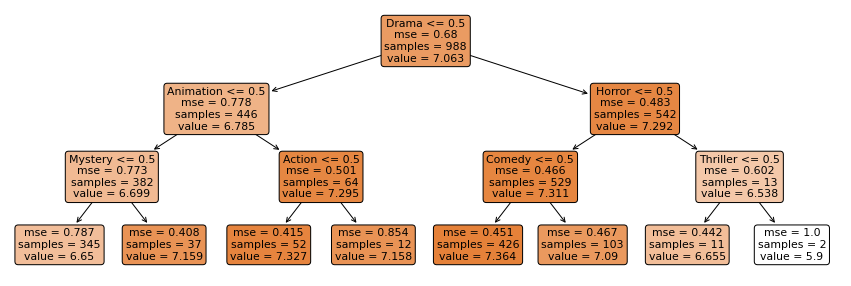

In [16]:
model = DecisionTreeRegressor(max_depth=3,random_state=33)

model.fit(X_train,y_train)
resultMSE = eval(X_test,y_test,model)
plot_tree(model,features)
